### 1. Import relevant libraries

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.graphics.api import abline_plot

import warnings
warnings.filterwarnings(action='ignore')

### 2. Load the data

In [14]:
# Define file paths for loading the data
train_data_path = 'train_data.csv'
test_data_path = 'test_data.csv'
train_target_path = 'train_target.csv'
test_target_path = 'test_target.csv'

# Load training and testing features from CSV files
X_train = pd.read_csv(train_data_path)
X_test = pd.read_csv(test_data_path)

# Load training and testing target variables from CSV files
y_train = pd.read_csv(train_target_path)['WQI']
y_test = pd.read_csv(test_target_path)['WQI'] 

In [15]:
# Display the summary information of the loaded data
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cond (μS/cm)     820 non-null    float64
 1   DO (mg/L)        820 non-null    float64
 2   pH               820 non-null    float64
 3   NO2 (mg/L)       820 non-null    float64
 4   NO3 (mg/L)       820 non-null    float64
 5   TN (mg/L)        820 non-null    float64
 6   TP (mg/L)        820 non-null    float64
 7   TSS (mg/L)       820 non-null    float64
 8   BOD (mg/L)       820 non-null    float64
 9   Turbidity (NTU)  820 non-null    float64
dtypes: float64(10)
memory usage: 64.2 KB


In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cond (μS/cm)     205 non-null    float64
 1   DO (mg/L)        205 non-null    float64
 2   pH               205 non-null    float64
 3   NO2 (mg/L)       205 non-null    float64
 4   NO3 (mg/L)       205 non-null    float64
 5   TN (mg/L)        205 non-null    float64
 6   TP (mg/L)        205 non-null    float64
 7   TSS (mg/L)       205 non-null    float64
 8   BOD (mg/L)       205 non-null    float64
 9   Turbidity (NTU)  205 non-null    float64
dtypes: float64(10)
memory usage: 16.1 KB


### 3. Modeling

Based on the information provided by info(), it seems that both the training and testing datasets have been loaded successfully without any missing values. Each dataset contains 10 columns, all of which are numerical (float64), including the target variable 'WQI'. There are 820 samples in the training set and 205 samples in the testing set, with 10 features each. 

Since the target variable, WQI, is continuous, Linear Regression, Random Forest Regression, and XGBoost Regression model are used to explore different approaches and leverage the strengths of each method.

#### 3a. Making a Linear Regression Model: first model

In [42]:
# Define the Linear Regression model
linear_model = LinearRegression()

# Define the range of number of splits
num_splits_range = [3, 5, 7, 10]

# Dictionary to store cross-validation scores for each number of splits
cv_scores = {}

for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    # Perform cross-validation
    cv_scores[num_splits] = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='r2')

# Print the cross-validation scores for each number of splits
for num_splits, scores in cv_scores.items():
    print(f"R2 scores for {num_splits}-fold cross-validation:")
    print(scores)
    print(f"Mean R2 score for {num_splits}-fold cross-validation:", np.mean(scores))

R2 scores for 3-fold cross-validation:
[1. 1. 1.]
Mean R2 score for 3-fold cross-validation: 1.0
R2 scores for 5-fold cross-validation:
[1. 1. 1. 1. 1.]
Mean R2 score for 5-fold cross-validation: 1.0
R2 scores for 7-fold cross-validation:
[1. 1. 1. 1. 1. 1. 1.]
Mean R2 score for 7-fold cross-validation: 1.0
R2 scores for 10-fold cross-validation:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean R2 score for 10-fold cross-validation: 1.0


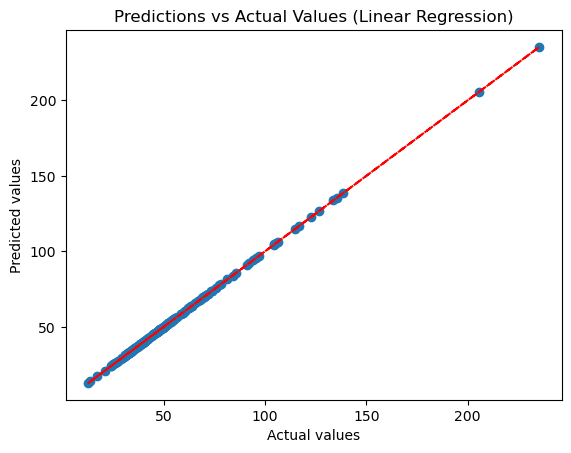

In [43]:
# Fit the model
linear_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred = linear_model.predict(X_test)

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Plot the perfect fit line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Linear Regression)')
plt.show()

#### 3b. Making a Random Forest Regression Methods: second model

In [ ]:
# Define the Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Dictionary to store cross-validation scores for each number of splits
cv_scores = {}

# Perform cross-validation and hyperparameter tuning for each number of splits
for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    # Perform hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_rf_model = grid_search.best_estimator_
    
     # Evaluate the best model using cross-validation on the training set
    cv_scores[num_splits] = cross_val_score(best_rf_model, X_train, y_train, cv=kf, scoring='r2')

# Print the cross-validation scores for each number of splits
for num_splits, scores in cv_scores.items():
    print(f"R2 scores for {num_splits}-fold cross-validation:")
    print(scores)
    print(f"Mean R2 score for {num_splits}-fold cross-validation:", np.mean(scores))

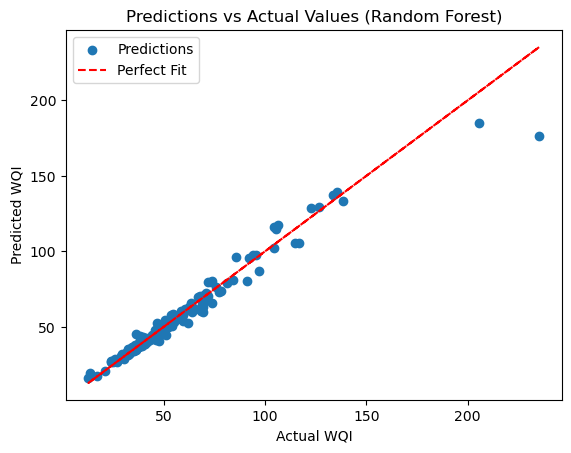

In [8]:
# Fit the best model on the training data
best_rf_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred_rf)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Plot the perfect fit line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Random Forest Regression)')
plt.show()

#### 3d. Making a XGBoost Regression Model: third model

In [ ]:
# Define the XGBoost regressor model
xgb_model = xgb.XGBRegressor()

# Dictionary to store cross-validation scores for each number of splits
cv_scores = {}

# Perform cross-validation and hyperparameter tuning for each number of splits
for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    # Perform hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1, 0.15],
        'min_child_weight': [1, 2, 3],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train, y_train)
    
    # Get the best model
    best_xgb_model = grid_search.best_estimator_
    
    # Evaluate the best model using cross-validation on the validation set
    cv_scores[num_splits] = cross_val_score(best_xgb_model, X_valid, y_valid, cv=kf, scoring='r2')

# Print the cross-validation scores for each number of splits
for num_splits, scores in cv_scores.items():
    print(f"R2 scores for {num_splits}-fold cross-validation:")
    print(scores)
    print(f"Mean R2 score for {num_splits}-fold cross-validation:", np.mean(scores))

In [ ]:
# Fit the best model on the training data
best_xgb_model.fit(X_train, y_train)

# Use the model to make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Plot the predictions against the actual values
plt.scatter(y_test, y_pred_xgb)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (XGBoost Regression)')
plt.show()

### 4. Model Evaluation

### 5. Final Model